In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import stumpy

# NDBC buoy dataset

In [2]:
data = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

In [3]:
data

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 288281)
Coordinates:
  * latitude                 (latitude) float32 40.25
  * longitude                (longitude) float32 -73.16
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 20...
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      44025
    comment:      LONG ISLAND - 30 NM South of Islip, NY
    location:     40.251 N 73.164 W

In [4]:
data2 = data.sel(time=slice('2019-01-01','2020-01-01'))

In [5]:
df = data2.to_dataframe().reset_index().set_index('time')
df.head()

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
time,,,,,,,,,,,,,,,
2019-01-01 00:50:00,40.250999,-73.164001,135.0,11.3,14.1,1.56,0 days 00:00:05.559999943,0 days 00:00:04.710000038,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN
2019-01-01 01:50:00,40.250999,-73.164001,127.0,11.2,14.0,1.92,0 days 00:00:05.880000114,0 days 00:00:05.090000153,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN
2019-01-01 02:50:00,40.250999,-73.164001,137.0,12.7,15.3,2.23,0 days 00:00:06.250000,0 days 00:00:05.219999790,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN
2019-01-01 03:50:00,40.250999,-73.164001,150.0,13.7,16.9,2.52,0 days 00:00:06.670000076,0 days 00:00:05.489999771,148.0,1010.700012,9.5,7.2,NaN,NaN,NaN
2019-01-01 04:50:00,40.250999,-73.164001,168.0,9.5,11.2,2.77,0 days 00:00:07.139999866,0 days 00:00:05.750000,141.0,1010.000000,10.2,7.2,NaN,NaN,NaN


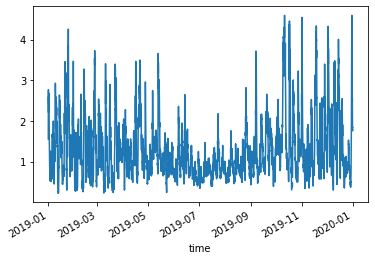

In [6]:
df.wave_height.plot();

In [7]:
hs = np.array(df.wave_height)

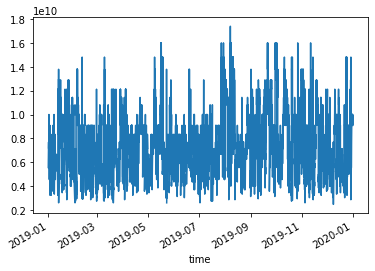

In [8]:
df.dominant_wpd.plot();

In [9]:
tp = np.array(df.dominant_wpd / timedelta(seconds=1))

# Stiffness

In [10]:
np.where(np.isnan(hs))

(array([ 753,  962,  971, 1280, 1576, 3543, 6915, 6920, 6939], dtype=int64),)

In [11]:
np.where(np.isnan(tp))

(array([ 273,  274,  275,  276,  278,  279,  281,  282,  283,  753,  962,
         971, 1280, 1576, 1582, 1583, 1584, 1585, 1586, 1839, 1840, 1841,
        3373, 3374, 3543, 6915, 6920, 6939], dtype=int64),)

In [12]:
s = hs / tp**2

In [13]:
s_nan = np.where(np.isnan(s))

In [14]:
s_drop = np.delete(s,np.where(np.isnan(s)))

In [15]:
np.interp(s_nan,np.delete(np.arange(len(s)),np.where(np.isnan(s))),s_drop)

array([[0.00202491, 0.00214368, 0.00226245, 0.00238123, 0.00256667,
        0.00263333, 0.00240058, 0.00210116, 0.00180174, 0.01890243,
        0.04412416, 0.0438328 , 0.02714348, 0.04713539, 0.01677071,
        0.01397657, 0.01118243, 0.00838828, 0.00559414, 0.00363891,
        0.00367494, 0.00371097, 0.01783063, 0.03036502, 0.04386436,
        0.00254914, 0.02323787, 0.03994917]])

In [16]:
s[np.where(np.isnan(s))] = np.interp(s_nan,np.delete(np.arange(len(s)),np.where(np.isnan(s))),s_drop)

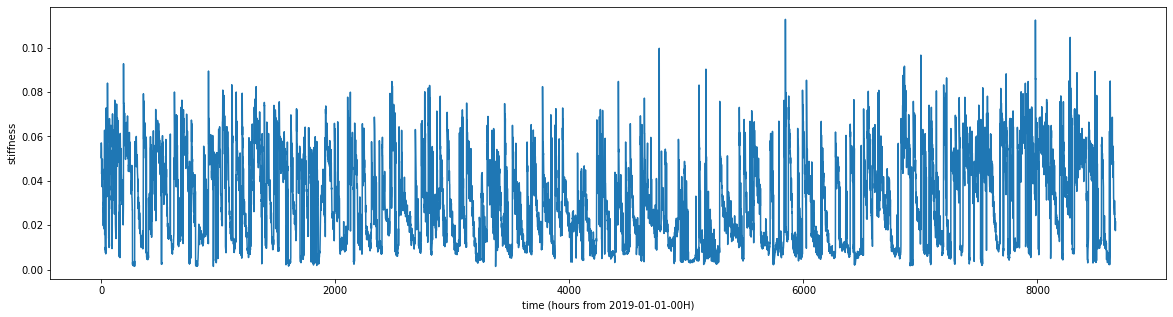

In [17]:
plt.figure(figsize=[20,5])
plt.plot(s[:])
plt.ylabel('stiffness')
plt.xlabel('time (hours from 2019-01-01-00H)')
plt.show()

In [18]:
m = 100
mp = stumpy.stump(s,m) 

In [19]:
motif_idx = np.argsort(mp[:, 0])[0] #closest pair
nearest_neighbor_idx = mp[motif_idx, 1]

In [20]:
print(motif_idx,nearest_neighbor_idx)

2957 6165


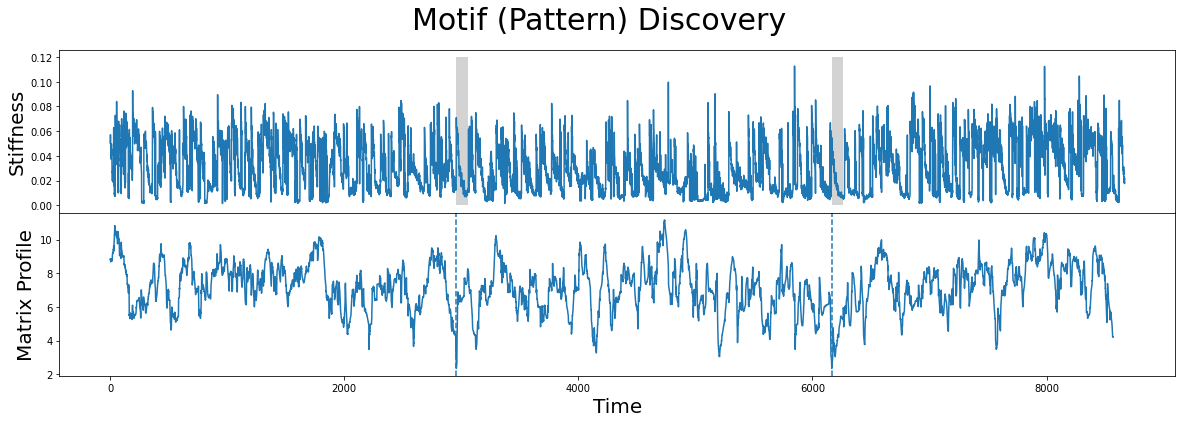

In [21]:
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(s)
axs[0].set_ylabel('Stiffness', fontsize='20')
rect = Rectangle((motif_idx-0, 0), m, 0.12, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx-0, 0), m, 0.12, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx-0, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx-0, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [22]:
discord_idx = np.argsort(mp[:, 0])[-1]
nearest_neighbor_distance = mp[discord_idx, 0]

In [23]:
print(discord_idx,nearest_neighbor_distance)

4736 11.157950693122814


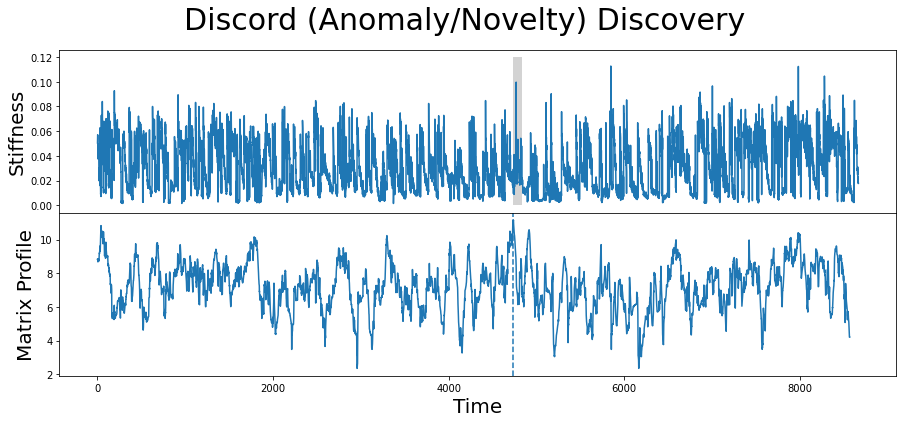

In [24]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [15, 6])
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

start = 0
end = -1
axs[0].plot(s[start:end])
axs[0].set_ylabel('Stiffness', fontsize='20')
rect = Rectangle((discord_idx-start, 0), m, 0.12, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx-start, linestyle="dashed")
axs[1].plot(mp[start:end, 0])
plt.show()